# Asssignment 08: Network Analysis

In [1]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# obtain Hamlet text from Project Gutenberg
with open('hamlet.txt', 'w', encoding='utf-8') as f:
    f.write(requests.get("https://www.gutenberg.org/cache/epub/1787/pg1787.txt").text)
document = open('hamlet.txt', 'r')
text_raw = document.read()

In [3]:
# clean up and extract only the content from Hamlet
text = text_raw[text_raw.find('SCENE'):text_raw.find('THE END')]
text = text.replace('Act ', 'ACT ')

In [4]:
# split text by acts
acts = text.split('ACT')[1:]

In [5]:
# find number of acts in Hamlet
len(acts)

5

In [6]:
# list and store characters in the play
# 'Claudius', 'Marcellus', 'Hamlet', 'Polonius', 'Horatio',
# 'Laertes', 'Voltemand', 'Cornelius', 'Rosencrantz', 'Guildenstern',
# 'Osric', 'A Gentleman', 'A Priest', 'Marcellus', 'Bernardo', 'Francisco',
# 'Reynaldo', 'Players', 'Two Clowns', 'Fortinbras', 'A Norwegian Captain', 'English Ambassadors'
# 'Gertrude', 'Ophelia', 'Ghost of Hamlet's Father'
characters = ['King.',
              'Mar.',
              'Ham.',
              'Pol.',
              'Hor.',
              'Laer.',
              'Volt.',
              'Cor.',
              'Ros.',
              'Guil.',
              'Osric',
              'Gent.',
              'Priest.',
              'Mar.',
              'Ber.',
              'Fran.',
              'Rey.',
              'Play.',
              'Clown.',
              'For.',
              'Capt.',
              'Ambassador.',
              'Queen.',
              'Oph.',
              'Ghost.']

In [7]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('Scene')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [8]:
charnum

{'King.': 14,
 'Mar.': 8,
 'Ham.': 13,
 'Pol.': 8,
 'Hor.': 9,
 'Laer.': 6,
 'Volt.': 2,
 'Cor.': 1,
 'Ros.': 7,
 'Guil.': 5,
 'Osric': 1,
 'Gent.': 1,
 'Priest.': 1,
 'Ber.': 2,
 'Fran.': 1,
 'Rey.': 1,
 'Play.': 2,
 'Clown.': 1,
 'For.': 1,
 'Capt.': 1,
 'Ambassador.': 1,
 'Queen.': 10,
 'Oph.': 5,
 'Ghost.': 4}

In [9]:
connections

{('King.', 'Mar.'): 2,
 ('King.', 'Ham.'): 9,
 ('King.', 'Pol.'): 6,
 ('King.', 'Hor.'): 6,
 ('King.', 'Laer.'): 5,
 ('King.', 'Volt.'): 2,
 ('King.', 'Cor.'): 1,
 ('King.', 'Ros.'): 6,
 ('King.', 'Guil.'): 5,
 ('King.', 'Osric'): 1,
 ('King.', 'Gent.'): 1,
 ('King.', 'Priest.'): 1,
 ('King.', 'Ber.'): 1,
 ('King.', 'Fran.'): 0,
 ('King.', 'Rey.'): 1,
 ('King.', 'Play.'): 2,
 ('King.', 'Clown.'): 1,
 ('King.', 'For.'): 0,
 ('King.', 'Capt.'): 0,
 ('King.', 'Ambassador.'): 1,
 ('King.', 'Queen.'): 9,
 ('King.', 'Oph.'): 4,
 ('King.', 'Ghost.'): 0,
 ('Mar.', 'Ham.'): 3,
 ('Mar.', 'Pol.'): 1,
 ('Mar.', 'Hor.'): 4,
 ('Mar.', 'Laer.'): 1,
 ('Mar.', 'Volt.'): 1,
 ('Mar.', 'Cor.'): 1,
 ('Mar.', 'Ros.'): 0,
 ('Mar.', 'Guil.'): 0,
 ('Mar.', 'Osric'): 0,
 ('Mar.', 'Gent.'): 0,
 ('Mar.', 'Priest.'): 0,
 ('Mar.', 'Mar.'): 4,
 ('Mar.', 'Ber.'): 4,
 ('Mar.', 'Fran.'): 2,
 ('Mar.', 'Rey.'): 0,
 ('Mar.', 'Play.'): 0,
 ('Mar.', 'Clown.'): 0,
 ('Mar.', 'For.'): 0,
 ('Mar.', 'Capt.'): 0,
 ('Mar.', 'Ambas

In [10]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

In [11]:
graphitems

[{'data': {'id': 'King.', 'label': 'King.', 'size': '14'}},
 {'data': {'id': 'Mar.', 'label': 'Mar.', 'size': '8'}},
 {'data': {'id': 'Ham.', 'label': 'Ham.', 'size': '13'}},
 {'data': {'id': 'Pol.', 'label': 'Pol.', 'size': '8'}},
 {'data': {'id': 'Hor.', 'label': 'Hor.', 'size': '9'}},
 {'data': {'id': 'Laer.', 'label': 'Laer.', 'size': '6'}},
 {'data': {'id': 'Volt.', 'label': 'Volt.', 'size': '2'}},
 {'data': {'id': 'Cor.', 'label': 'Cor.', 'size': '1'}},
 {'data': {'id': 'Ros.', 'label': 'Ros.', 'size': '7'}},
 {'data': {'id': 'Guil.', 'label': 'Guil.', 'size': '5'}},
 {'data': {'id': 'Osric', 'label': 'Osric', 'size': '1'}},
 {'data': {'id': 'Gent.', 'label': 'Gent.', 'size': '1'}},
 {'data': {'id': 'Priest.', 'label': 'Priest.', 'size': '1'}},
 {'data': {'id': 'Ber.', 'label': 'Ber.', 'size': '2'}},
 {'data': {'id': 'Fran.', 'label': 'Fran.', 'size': '1'}},
 {'data': {'id': 'Rey.', 'label': 'Rey.', 'size': '1'}},
 {'data': {'id': 'Play.', 'label': 'Play.', 'size': '2'}},
 {'data

In [12]:
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)

In [13]:
graphitems

[{'data': {'id': 'King.', 'label': 'King.', 'size': '14'}},
 {'data': {'id': 'Mar.', 'label': 'Mar.', 'size': '8'}},
 {'data': {'id': 'Ham.', 'label': 'Ham.', 'size': '13'}},
 {'data': {'id': 'Pol.', 'label': 'Pol.', 'size': '8'}},
 {'data': {'id': 'Hor.', 'label': 'Hor.', 'size': '9'}},
 {'data': {'id': 'Laer.', 'label': 'Laer.', 'size': '6'}},
 {'data': {'id': 'Volt.', 'label': 'Volt.', 'size': '2'}},
 {'data': {'id': 'Cor.', 'label': 'Cor.', 'size': '1'}},
 {'data': {'id': 'Ros.', 'label': 'Ros.', 'size': '7'}},
 {'data': {'id': 'Guil.', 'label': 'Guil.', 'size': '5'}},
 {'data': {'id': 'Osric', 'label': 'Osric', 'size': '1'}},
 {'data': {'id': 'Gent.', 'label': 'Gent.', 'size': '1'}},
 {'data': {'id': 'Priest.', 'label': 'Priest.', 'size': '1'}},
 {'data': {'id': 'Ber.', 'label': 'Ber.', 'size': '2'}},
 {'data': {'id': 'Fran.', 'label': 'Fran.', 'size': '1'}},
 {'data': {'id': 'Rey.', 'label': 'Rey.', 'size': '1'}},
 {'data': {'id': 'Play.', 'label': 'Play.', 'size': '2'}},
 {'data

In [14]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('King.', 'Mar.'),
 ('King.', 'Ham.'),
 ('King.', 'Pol.'),
 ('King.', 'Hor.'),
 ('King.', 'Laer.'),
 ('King.', 'Volt.'),
 ('King.', 'Cor.'),
 ('King.', 'Ros.'),
 ('King.', 'Guil.'),
 ('King.', 'Osric'),
 ('King.', 'Gent.'),
 ('King.', 'Priest.'),
 ('King.', 'Ber.'),
 ('King.', 'Rey.'),
 ('King.', 'Play.'),
 ('King.', 'Clown.'),
 ('King.', 'Ambassador.'),
 ('King.', 'Queen.'),
 ('King.', 'Oph.'),
 ('Mar.', 'Ham.'),
 ('Mar.', 'Pol.'),
 ('Mar.', 'Hor.'),
 ('Mar.', 'Laer.'),
 ('Mar.', 'Volt.'),
 ('Mar.', 'Cor.'),
 ('Mar.', 'Mar.'),
 ('Mar.', 'Ber.'),
 ('Mar.', 'Fran.'),
 ('Mar.', 'Queen.'),
 ('Mar.', 'Ghost.'),
 ('Ham.', 'Pol.'),
 ('Ham.', 'Hor.'),
 ('Ham.', 'Laer.'),
 ('Ham.', 'Volt.'),
 ('Ham.', 'Cor.'),
 ('Ham.', 'Ros.'),
 ('Ham.', 'Guil.'),
 ('Ham.', 'Osric'),
 ('Ham.', 'Priest.'),
 ('Ham.', 'Mar.'),
 ('Ham.', 'Ber.'),
 ('Ham.', 'Play.'),
 ('Ham.', 'Clown.'),
 ('Ham.', 'For.'),
 ('Ham.', 'Capt.'),
 ('Ham.', 'Ambassador.'),
 ('Ham.', 'Queen.'),
 ('Ham.', 'Oph.'),
 ('Ham.', 'Ghost.'),
 

In [15]:
G = nx.Graph()

In [16]:
G.add_edges_from(nxgraphitems)

In [17]:
G.nodes

NodeView(('King.', 'Mar.', 'Ham.', 'Pol.', 'Hor.', 'Laer.', 'Volt.', 'Cor.', 'Ros.', 'Guil.', 'Osric', 'Gent.', 'Priest.', 'Ber.', 'Rey.', 'Play.', 'Clown.', 'Ambassador.', 'Queen.', 'Oph.', 'Fran.', 'Ghost.', 'For.', 'Capt.'))

In [18]:
nx.degree_centrality(G)

{'King.': 0.8260869565217391,
 'Mar.': 0.5652173913043478,
 'Ham.': 0.8695652173913043,
 'Pol.': 0.6521739130434783,
 'Hor.': 0.8695652173913043,
 'Laer.': 0.6956521739130435,
 'Volt.': 0.5217391304347826,
 'Cor.': 0.3913043478260869,
 'Ros.': 0.4782608695652174,
 'Guil.': 0.3913043478260869,
 'Osric': 0.30434782608695654,
 'Gent.': 0.21739130434782608,
 'Priest.': 0.2608695652173913,
 'Ber.': 0.4782608695652174,
 'Rey.': 0.13043478260869565,
 'Play.': 0.4782608695652174,
 'Clown.': 0.2608695652173913,
 'Ambassador.': 0.30434782608695654,
 'Queen.': 0.8260869565217391,
 'Oph.': 0.43478260869565216,
 'Fran.': 0.17391304347826086,
 'Ghost.': 0.30434782608695654,
 'For.': 0.13043478260869565,
 'Capt.': 0.13043478260869565}

In [19]:
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Ham.           : 0.870
Hor.           : 0.870
King.          : 0.826
Queen.         : 0.826
Laer.          : 0.696
Pol.           : 0.652
Mar.           : 0.565
Volt.          : 0.522
Ros.           : 0.478
Ber.           : 0.478
Play.          : 0.478
Oph.           : 0.435
Cor.           : 0.391
Guil.          : 0.391
Osric          : 0.304
Ambassador.    : 0.304
Ghost.         : 0.304
Priest.        : 0.261
Clown.         : 0.261
Gent.          : 0.217
Fran.          : 0.174
Rey.           : 0.130
For.           : 0.130
Capt.          : 0.130


In [20]:
nx.betweenness_centrality(G)

{'King.': 0.09379979923458186,
 'Mar.': 0.013438735177865613,
 'Ham.': 0.16919505615157787,
 'Pol.': 0.04253717297195557,
 'Hor.': 0.1163953196561892,
 'Laer.': 0.03919944789510007,
 'Volt.': 0.006634669678147939,
 'Cor.': 0.0,
 'Ros.': 0.04165568730786122,
 'Guil.': 0.0009881422924901185,
 'Osric': 0.0,
 'Gent.': 0.0,
 'Priest.': 0.0,
 'Ber.': 0.013438735177865613,
 'Rey.': 0.0,
 'Play.': 0.00678524374176548,
 'Clown.': 0.0,
 'Ambassador.': 0.0,
 'Queen.': 0.06794340924775708,
 'Oph.': 0.019312692138779095,
 'Fran.': 0.0,
 'Ghost.': 0.005039525691699605,
 'For.': 0.0,
 'Capt.': 0.0}

In [21]:
dc = nx.betweenness_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Ham.           : 0.169
Hor.           : 0.116
King.          : 0.094
Queen.         : 0.068
Pol.           : 0.043
Ros.           : 0.042
Laer.          : 0.039
Oph.           : 0.019
Mar.           : 0.013
Ber.           : 0.013
Play.          : 0.007
Volt.          : 0.007
Ghost.         : 0.005
Guil.          : 0.001
Cor.           : 0.000
Osric          : 0.000
Gent.          : 0.000
Priest.        : 0.000
Rey.           : 0.000
Clown.         : 0.000
Ambassador.    : 0.000
Fran.          : 0.000
For.           : 0.000
Capt.          : 0.000


In [22]:
from networkx.algorithms.community.centrality import girvan_newman

In [23]:
communities = girvan_newman(G)

[['Cor.', 'Priest.', 'Ghost.', 'Ber.', 'Queen.', 'Clown.', 'Laer.', 'Gent.', 'Hor.', 'Volt.', 'Osric', 'Rey.', 'Mar.', 'Guil.', 'Ambassador.', 'Ham.', 'Play.', 'King.', 'Fran.', 'Ros.', 'Oph.', 'Pol.'], ['For.', 'Capt.']]


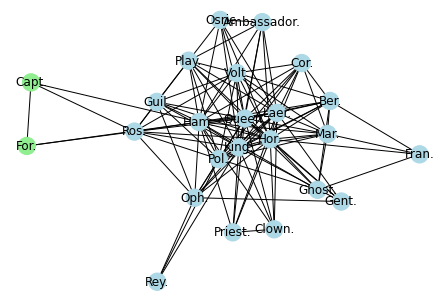

In [24]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [25]:
nx.density(G)

0.44565217391304346

In [26]:
from networkx.algorithms.community import greedy_modularity_communities

In [27]:
greedy_modularity_communities(G)

[frozenset({'Ambassador.',
            'Clown.',
            'Gent.',
            'King.',
            'Laer.',
            'Oph.',
            'Osric',
            'Play.',
            'Priest.',
            'Queen.',
            'Rey.'}),
 frozenset({'Ber.',
            'Cor.',
            'Fran.',
            'Ghost.',
            'Hor.',
            'Mar.',
            'Pol.',
            'Volt.'}),
 frozenset({'Capt.', 'For.', 'Guil.', 'Ham.', 'Ros.'})]

In [28]:
communities = greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [29]:
modularity_class

{'Priest.': 0,
 'Play.': 0,
 'Ambassador.': 0,
 'Queen.': 0,
 'King.': 0,
 'Osric': 0,
 'Laer.': 0,
 'Rey.': 0,
 'Clown.': 0,
 'Oph.': 0,
 'Gent.': 0,
 'Cor.': 1,
 'Ghost.': 1,
 'Volt.': 1,
 'Ber.': 1,
 'Fran.': 1,
 'Mar.': 1,
 'Pol.': 1,
 'Hor.': 1,
 'Ham.': 2,
 'Capt.': 2,
 'Guil.': 2,
 'For.': 2,
 'Ros.': 2}

[['Priest.', 'Play.', 'Ambassador.', 'Queen.', 'King.', 'Osric', 'Laer.', 'Rey.', 'Clown.', 'Oph.', 'Gent.'], ['Cor.', 'Ghost.', 'Volt.', 'Ber.', 'Fran.', 'Mar.', 'Pol.', 'Hor.'], ['Ham.', 'Capt.', 'Guil.', 'For.', 'Ros.']]


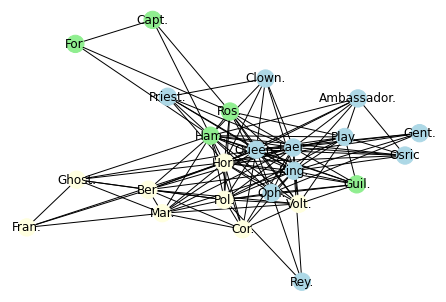

In [30]:
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('lightblue')
    elif node in node_groups[1]:
        color_map.append('lightyellow')
    else:
        color_map.append('lightgreen')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

Three node groups are formed. Characters with more node connections and are in the center are Hamlet, Horatio, and King and Queen.

In [31]:
graphitems = []

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'blue'
    elif k in node_groups[1]:
        modularity = 'green'
    else:
        modularity = 'red'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

9


[{'data': {'id': 'King.',
   'label': 'King.',
   'size': '14',
   'modularity': 'blue'}},
 {'data': {'id': 'Mar.', 'label': 'Mar.', 'size': '8', 'modularity': 'green'}},
 {'data': {'id': 'Ham.', 'label': 'Ham.', 'size': '13', 'modularity': 'red'}},
 {'data': {'id': 'Pol.', 'label': 'Pol.', 'size': '8', 'modularity': 'green'}},
 {'data': {'id': 'Hor.', 'label': 'Hor.', 'size': '9', 'modularity': 'green'}},
 {'data': {'id': 'Laer.',
   'label': 'Laer.',
   'size': '6',
   'modularity': 'blue'}},
 {'data': {'id': 'Volt.',
   'label': 'Volt.',
   'size': '2',
   'modularity': 'green'}},
 {'data': {'id': 'Cor.', 'label': 'Cor.', 'size': '1', 'modularity': 'green'}},
 {'data': {'id': 'Ros.', 'label': 'Ros.', 'size': '7', 'modularity': 'red'}},
 {'data': {'id': 'Guil.', 'label': 'Guil.', 'size': '5', 'modularity': 'red'}},
 {'data': {'id': 'Osric',
   'label': 'Osric',
   'size': '1',
   'modularity': 'blue'}},
 {'data': {'id': 'Gent.',
   'label': 'Gent.',
   'size': '1',
   'modularity': '